# Exploratory analysis for year 2005
Exploratory data analysis for diplomatic relations for year 2005.

Run `diplomatic_exchanges.py` file first to create a db with data.

## Packages

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create a plots folder to store plots
import os
if not os.path.exists('./plots/'):
    os.mkdir('./plots')
if not os.path.exists('./plots/demo'):
    os.mkdir('./plots/demo')
    

## Analysis

In [3]:
# import our diplomatic_exchanges python script
import diplomatic_exchanges as de

In [4]:
# connect to database and load data for 2005 as a graph
conn = sqlite3.connect('./diplomatic.db')
G = de.get_diplomatic_graph(conn, 2005)

In [5]:
# check some basic network metrics
print('number of edges:', G.size())
print('number of nodes:', len(G.nodes()))
print('density:', nx.density(G))

number of edges: 7470
number of nodes: 192
density: 0.2036976439790576


In [6]:
# adjacency matrix
H = nx.adjacency_matrix(G)
H

<192x192 sparse matrix of type '<class 'numpy.intc'>'
	with 7470 stored elements in Compressed Sparse Row format>

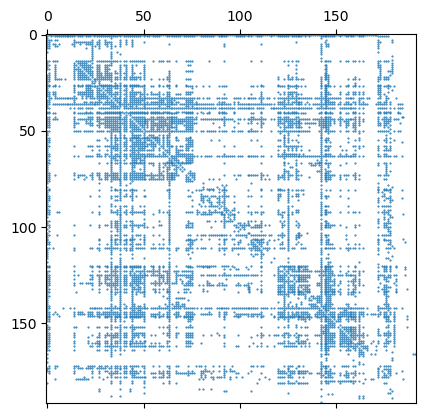

In [7]:
# plot adjacency matrix
fig, ax = plt.subplots(1,1, figsize=(6.4, 4.8))
ax.spy(H, markersize =1, marker = '.')
fig.savefig('./plots/demo/adj_matr_2005.png', dpi=300)

We see that the network is quite sparse

In [8]:
# load centrality measures for year 2005
df_centralities = de.get_centrality_measures(year=2005)
df_centralities

,index,pagerank,betweenness,closeness,katz,in_degree,out_degreee,node_id,year
0,24,1.000000,7.301305e-04,1.0,0.348819,0.948718,1.000000,2,2005
1,48,0.521256,3.509150e-02,1.0,0.466178,0.621795,0.701754,20,2005
2,73,0.014564,9.309024e-06,1.0,0.551500,0.025641,0.017544,31,2005
3,104,0.046998,0.000000e+00,1.0,0.761892,0.070513,0.087719,41,2005
4,147,0.136362,2.927713e-03,1.0,0.595980,0.185897,0.157895,42,2005
...,...,...,...,...,...,...,...,...,...
187,1659,0.011548,0.000000e+00,1.0,0.524989,0.025641,0.011696,760,2005
188,1661,0.000000,0.000000e+00,1.0,0.507905,0.000000,0.029240,935,2005
189,1663,0.000000,0.000000e+00,1.0,0.507905,0.000000,0.017544,946,2005
190,1664,0.000000,0.000000e+00,1.0,0.507905,0.006410,0.000000,947,2005


Text(0.5, 1.0, 'Correlation coefficients, year 2005')

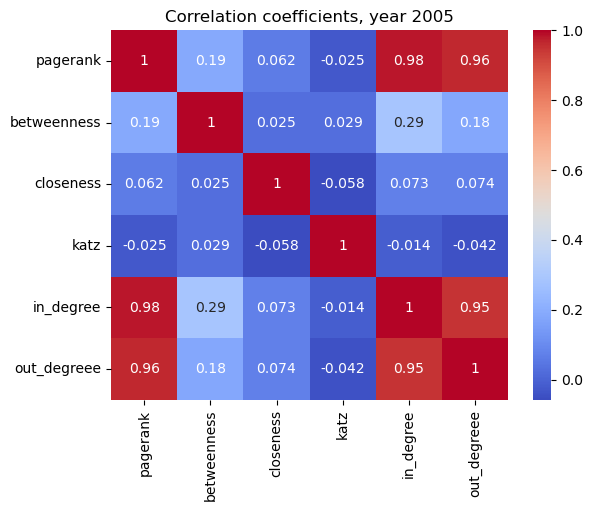

In [9]:
# check for correlation between measures
correlations = df_centralities.drop(['index', 'node_id', 'year'], axis=1).corr()
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.title("Correlation coefficients, year 2005")

We see that the measures are generally highly correlated with each other

In [10]:
# load country and country codes mappings
from diplomatic_exchanges import CODES_TO_COUNTRIES_DICT, COUNTRIES_TO_CODES_DICT
CODES_TO_COUNTRIES_DICT[2]= "USA"
CODES_TO_COUNTRIES_DICT[200] = "UK"
CODES_TO_COUNTRIES_DICT[490] = "Congo"

In [11]:
COUNTRIES_TO_CODES_DICT['United Arab Emirates']

696

In [12]:
CODES_TO_COUNTRIES_DICT[696] = 'Arab Emirates'

In [13]:
# centrality measures to examine
measures = ['pagerank', 'betweenness', 'closeness', 'katz', 'in_degree', 'out_degreee']

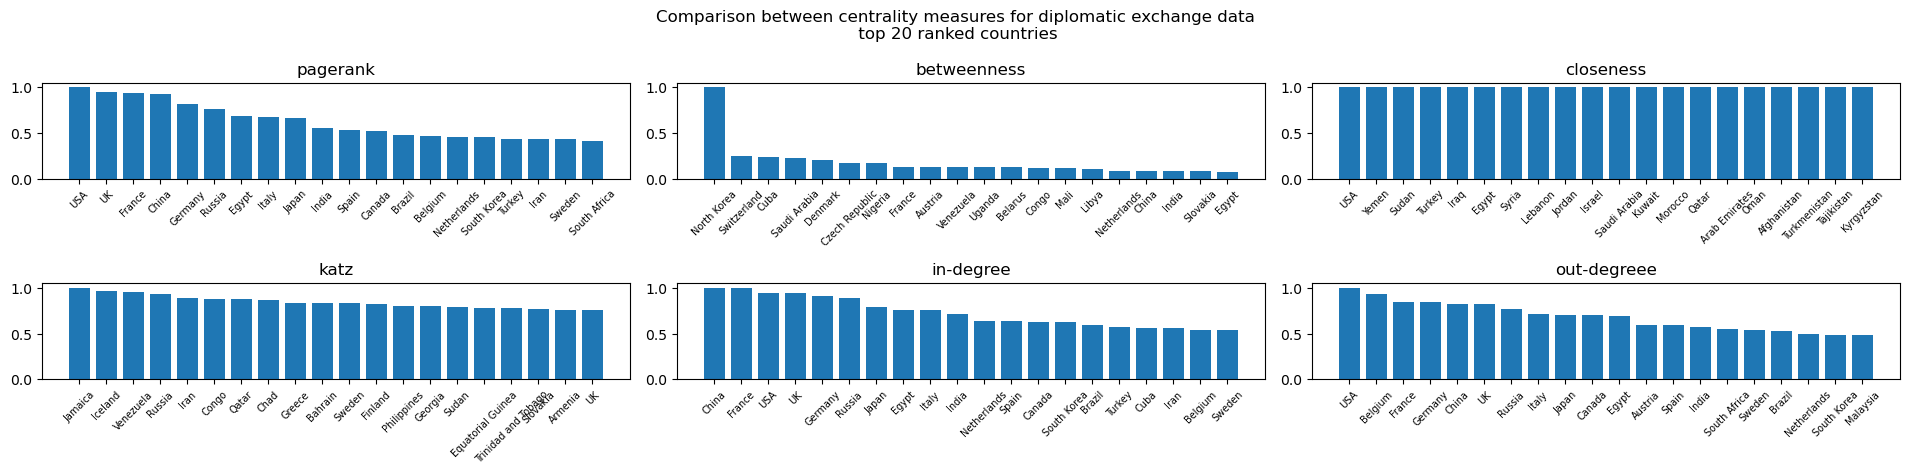

In [14]:
# plot centrality measures for top 20 rankings according to each measure
fig, axs = plt.subplots(2,3, figsize=(3*6.4,4.8), tight_layout=True)

limit = 20
# count = 1
for ax, column in zip(axs.flatten(), measures):
    # if count > 5: break
    sorted_measures = df_centralities.sort_values(column, ascending=False)
    sorted_measure = sorted_measures[column].values[:limit]
    country_codes = sorted_measures['node_id'].values[:limit]
    country_names = list(map(lambda x: CODES_TO_COUNTRIES_DICT[x], country_codes))
    ax.bar(country_names, sorted_measure)
    ax.set_xticklabels(country_names, rotation=45, fontsize=7);
    ax.set_title(column.replace('_','-'))
    # count += 1
fig.suptitle(f"Comparison between centrality measures for diplomatic exchange data\n top {limit} ranked countries")
fig.savefig(f'./plots/demo/2005_comparison_between_measures_top_{limit}.png', dpi=300)

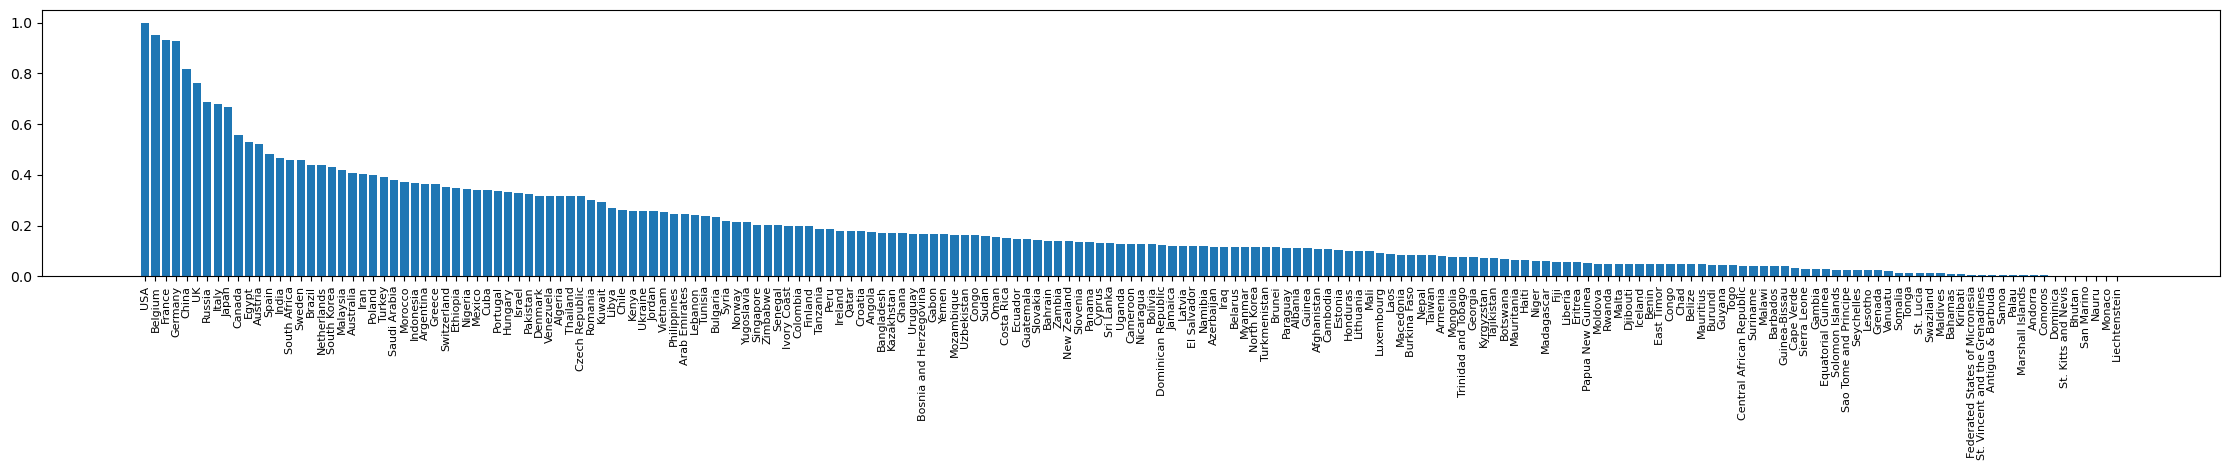

In [15]:
# Pagerank ranking for all countries
fig, ax = plt.subplots(1,1, figsize=(3.5*6.4, 4.8), tight_layout=True)


ax.bar(list(map(lambda x: CODES_TO_COUNTRIES_DICT[x], df_centralities.sort_values('pagerank', ascending=False)['node_id'])), df_centralities.sort_values('pagerank', ascending=False)['pagerank'])
ax.set_xticklabels(list(map(lambda x: CODES_TO_COUNTRIES_DICT[x], df_centralities.sort_values(column, ascending=False)['node_id'])),rotation=90, fontsize=7);
ax.tick_params(axis='x', which='major', labelsize=8)
fig.savefig('./plots/demo/2005_pagerank_weighted.png', dpi=300)

Text(0.5, 0.98, 'Comparison between sorted centrality measures')

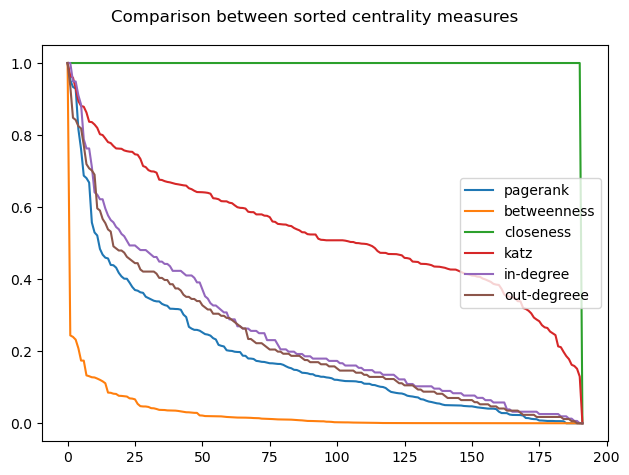

In [16]:
# comparison between sorted measures
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for column in measures:
    sorted_measures = df_centralities.sort_values(column, ascending=False)
    sorted_measure = sorted_measures[column].values
    country_codes = sorted_measures['node_id'].values
    country_names = list(map(lambda x: CODES_TO_COUNTRIES_DICT[x], country_codes))
    ax.plot(sorted_measure, label=column.replace('_','-'))
ax.legend()

fig.suptitle("Comparison between sorted centrality measures")

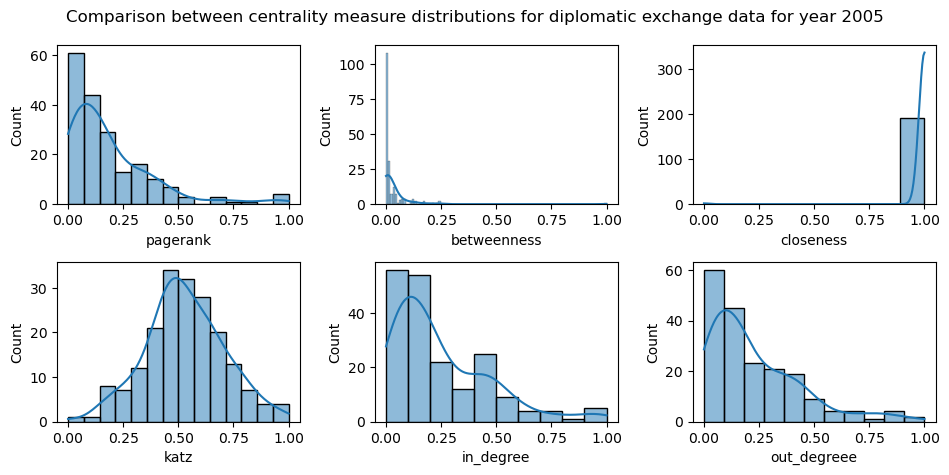

In [17]:
# distributions of centraltiy measures
fig, axs = plt.subplots(2,3, figsize=(1.5*6.4,4.8), tight_layout=True)
limit = 20
# count = 1
for ax, column in zip(axs.flatten(), measures):
    sns.histplot(df_centralities[column], ax=ax, kde = True)
fig.suptitle(f"Comparison between centrality measure distributions for diplomatic exchange data for year 2005")
fig.savefig(f'./plots/demo/2005_comparison_between_measure_distributions.png', dpi=300)

## Network visualizations

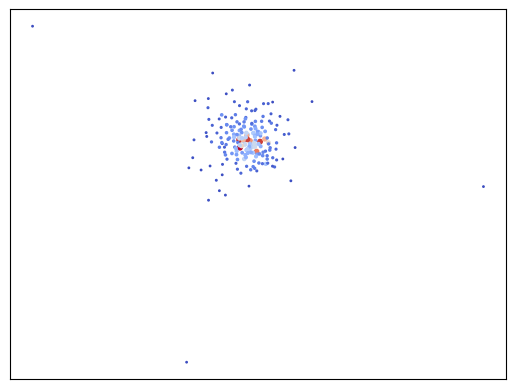

In [18]:
# a first attempt to visualize the network
fig, ax = plt.subplots(1,1, figsize=(6.4, 4.8))

layout = nx.spring_layout(G,iterations=15, seed=42)
column = 'pagerank'

nx.draw_networkx_nodes(G, pos=layout, node_size = 10*df_centralities['pagerank'].values +1,
node_color = df_centralities['pagerank'].values+1, cmap='coolwarm', ax=ax)
fig.savefig('./plots/demo/graph_pagerank_2005.png', dpi = 300)

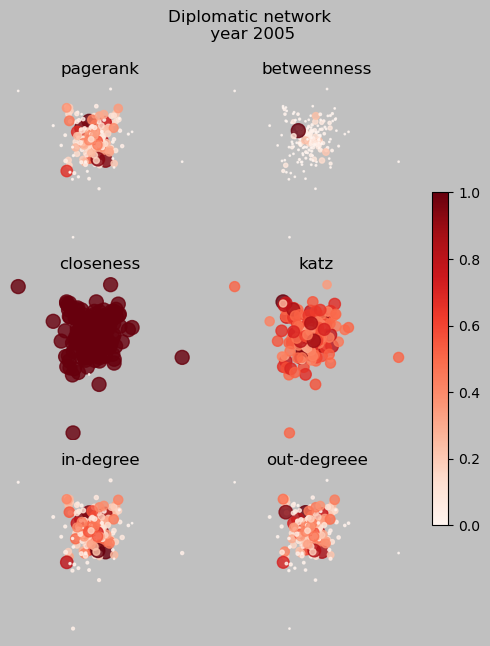

In [19]:
# Comparison between measures in network visualization
fig, axs = plt.subplots(3,2, figsize=( 6.4,1.5* 4.8))#,dpi = 300)

fig.patch.set_facecolor('silver')

# layout = nx.random_layout(G, seed=42)
layout = nx.spring_layout(G, iterations=5, seed=42)
for ax, column in zip(axs.flatten(), measures):
    nx.draw_networkx_nodes(G, pos=layout, node_size = 100*df_centralities[column].values +1,
                           node_color = df_centralities[column].values+1, cmap=plt.cm.Reds, ax=ax, alpha=0.8)
    ax.set_title(column.replace('_','-'))
    ax.axis('off')
    
    
# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=df_centralities[measures].min().min(),
                                                               vmax=df_centralities[measures].max().max()))
sm._A = []
cbar = fig.colorbar(sm, ax=axs, shrink=0.6)
fig.suptitle("Diplomatic network\n year 2005")
fig.savefig("./plots/demo/centrality_comparison_2005_graphs.png", dpi=300)

### Top 10 nodes graph
Connections of top 10 nodes according to pagerank, connected with each other

In [20]:
top_10_nodes = df_centralities.sort_values('pagerank',ascending=False)['node_id'].values[:10]
top10_subgraph = G.subgraph(top_10_nodes)

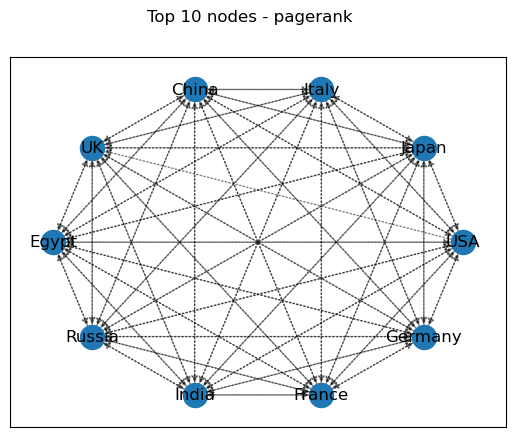

In [21]:
# nx.draw(top10_subgraph)
fig, ax = plt.subplots(1,1, figsize=(6.4, 4.8))
layout = nx.circular_layout(top10_subgraph)#, seed=42)
# nx.draw_networkx(top10_subgraph, layout)
nx.draw_networkx_nodes(top10_subgraph, pos=layout, ax=ax)#,node_size = 50*page_rank_scores_scaled, node_color = page_rank_scores_scaled, cmap='coolwarm', ax=ax)
nx.draw_networkx_edges(top10_subgraph, pos=layout, alpha=0.5,ax=ax, style='dotted');
nx.draw_networkx_labels(top10_subgraph, layout, {i: CODES_TO_COUNTRIES_DICT[i] for i in top10_subgraph.nodes()}, ax=ax);
fig.suptitle("Top 10 nodes - pagerank")
fig.savefig('./plots/demo/top10nodes_pagerank_2005.png', dpi=200)

In [22]:
# these top countries are not connected
print((2, 200) in list(top10_subgraph.edges))
print((200, 2) in list(top10_subgraph.edges))
print(CODES_TO_COUNTRIES_DICT[2], CODES_TO_COUNTRIES_DICT[200])

True
False
USA UK


### Top 4 nodes
Connections of the top 4 nocdes according to pagerank with the rest of the nodes

In [23]:
# check the top 4 nodes connections with the rest of the nodes
top_4_nodes =  df_centralities.sort_values('pagerank',ascending=False)['node_id'].values[:4]
top_4_graph = nx.DiGraph() 

# add the edges between the subset nodes and the rest of the nodes
for node in G.nodes():
    if node in top_4_nodes:
        for neighbor in G.neighbors(node):
            top_4_graph.add_edge(node, neighbor, )

In [24]:
# the filtered graph containing only the connections to the top 4 nodes
filtered_G = nx.DiGraph()

# add the nodes from the full graph to the filtered graph
for node in G.nodes():
    filtered_G.add_node(node)

# add the edges from the subset_edges to the filtered graph
for edge in top_4_graph.edges:
    filtered_G.add_edge(*edge)

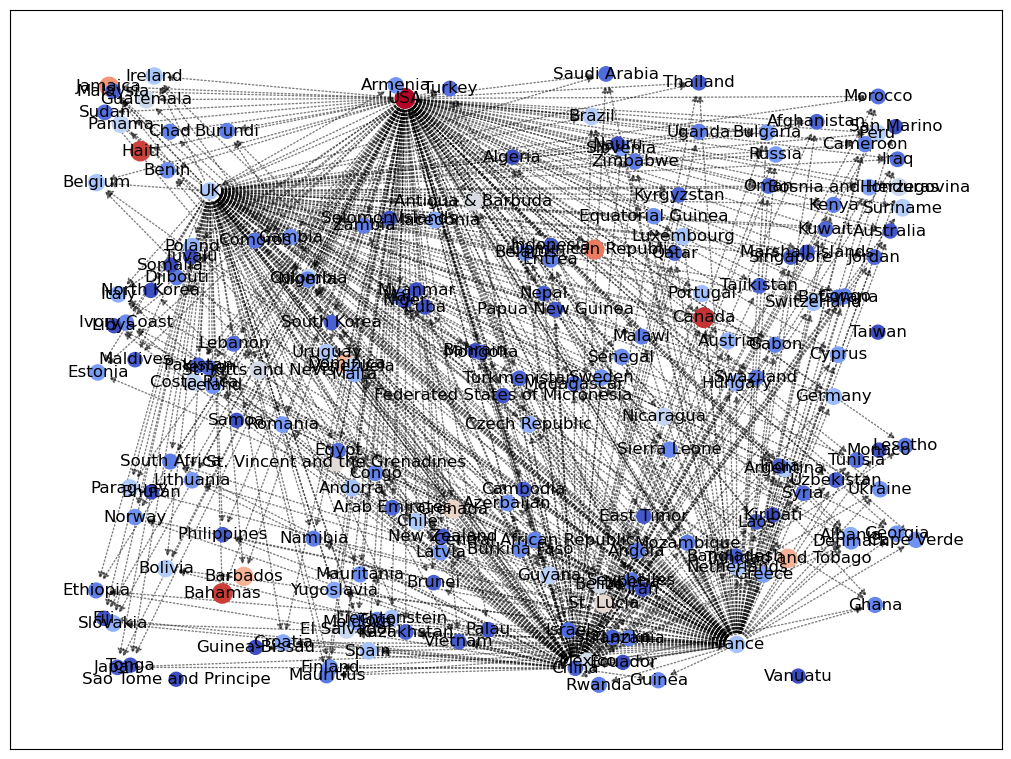

In [25]:
# a first visualization attempt using networkx
fig, ax = plt.subplots(1,1, figsize=(2*6.4, 2*4.8))

# layout = nx.nx_agraph.graphviz_layout(filtered_G)
layout = nx.random_layout(G, seed=42)

scores = 100* df_centralities.sort_values('pagerank',ascending=False)['pagerank'].values + 100
node_list = df_centralities.sort_values('pagerank',ascending=False)['node_id'].values[:20]

nx.draw_networkx_nodes(filtered_G,pos=layout,node_size = scores, node_color = scores, cmap='coolwarm', ax=ax)
nx.draw_networkx_edges(filtered_G, pos=layout, alpha=0.5,ax=ax, style='dotted');
nx.draw_networkx_labels(filtered_G, layout, {i: CODES_TO_COUNTRIES_DICT[i] for i in filtered_G.nodes()}, ax=ax);
fig.savefig('./plots/demo/graph_top4_nodes_pagerank_2005.png', dpi=300)

### A smaller visualization and comparison across time

We will compare a small number of nodes using a random walk on the graph for two years (1980 and 2005)

In [26]:
import random

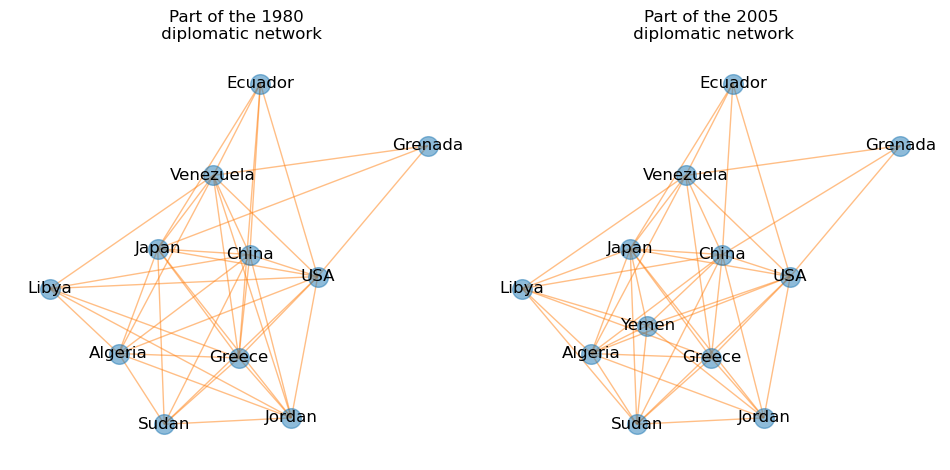

In [27]:
# create a figure to plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(1.5*6.4, 4.8), tight_layout = True) 
ax2, ax1 = ax1, ax2

# set the number of steps for the random walk
num_steps = 10
random.seed(43)

# choose a random starting node
current_node = random.choice(list(G.nodes()))
# create a list to store the nodes visited
nodes_visited = [current_node]

# perform the random walk
for i in range(num_steps):
    neighbors = list(G.neighbors(current_node))
    if not neighbors:
        break
    current_node = random.choice(neighbors)
    nodes_visited.append(current_node)

# add the USA to the walk
nodes_visited.append(2)

# country names
labels = {n:CODES_TO_COUNTRIES_DICT[n] for n in nodes_visited}

# create a subgraph of the nodes visited
subgraph = G.subgraph(nodes_visited).to_undirected()

# plot the subgraph with edges
pos = nx.spring_layout(subgraph, seed = 42)
nx.draw_networkx_nodes(subgraph, pos, alpha=0.5, node_size=200, ax=ax1)
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, edge_color='tab:orange', ax=ax1)
nx.draw_networkx_labels(subgraph, pos, labels, ax=ax1)
ax1.set_title("Part of the 2005\n diplomatic network")
ax1.axis("off")

# load the 1980 graph and its centralities
G_1980 = de.get_diplomatic_graph(conn, 1980)
df_centralities_1980 = de.get_centrality_measures(year=1980)

# Yemen (679) is not present in 1980, we remove it from the nodes to plot for this year
nodes_visited_1980 = [n for n in nodes_visited if n!=679]
labels_1980 = {n:CODES_TO_COUNTRIES_DICT[n] for n in nodes_visited_1980}
subgraph = G_1980.subgraph(nodes_visited_1980).to_undirected()

# plot the 1980 subgraph
nx.draw_networkx_nodes(subgraph, pos, alpha=0.5, node_size=200,ax=ax2)
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, edge_color='tab:orange', ax=ax2)
nx.draw_networkx_labels(subgraph, pos, labels_1980, ax=ax2)
ax2.set_title("Part of the 1980 \n diplomatic network")
ax2.axis("off")
fig.savefig('./plots/demo/comparison_between_2005_1980.png', dpi=300)
plt.show()

# Alternative visualizations

We try an alternative visualization of the top 4 nodes according to pagerank using pyvis

In [28]:
from pyvis.network import Network

In [37]:
# small network visualization with pyvis
net = Network(height='700px', select_menu=True, width='100%', bgcolor='#222222', font_color='white')

graph_for_viz = subgraph
net.from_nx(graph_for_viz)

for node in graph_for_viz.nodes:
    if node in top_4_nodes:
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color="#3e5596")
    elif node in top_10_nodes:
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color="#60963e")
    else:
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color='#966a3e')
for edge in graph_for_viz.edges():
    net.add_edge(str(edge[0]), str(edge[1]))    
    
net.show_buttons(filter_=['physics', 'nodes'])
net.show("random_walk_graph_2005.html")

In [39]:
# top 4 nodes network visualization with pyvis

# get top 20 nodes for different colors
top_50_nodes = df_centralities.sort_values('pagerank',ascending=False)['node_id'].values[:20]

net = Network(height='700px', select_menu=True, width='100%', bgcolor='#222222', font_color='white')

graph_for_viz = filtered_G
net.from_nx(graph_for_viz)

for node in graph_for_viz.nodes:
    if node in top_4_nodes: # top 4 nodes as blue
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color="#3e5596")
    elif node in top_50_nodes: # rest of top 50 nodes as green
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color="#60963e")
    else: # rest of nodes as orange
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color='#966a3e')
for edge in graph_for_viz.edges():
    net.add_edge(str(edge[0]), str(edge[1]))    
    
net.show_buttons(filter_=['physics', 'nodes'])
net.show("top_4_pagerank_nodes_graph_2005_and_top20_nodes.html")

In [84]:
# all network
net = Network(height='700px', select_menu=True, width='100%', bgcolor='#222222', font_color='white')

graph_for_viz = G
net.from_nx(graph_for_viz)

for node in graph_for_viz.nodes:
    if node in top_4_nodes:
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color="#3e5596")
    elif node in top_10_nodes:
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color="#60963e")
    else:
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color='#966a3e')
for edge in graph_for_viz.edges():
    net.add_edge(str(edge[0]), str(edge[1]))    
    
net.show_buttons(filter_=['physics', 'nodes'])
net.show("graph_2005.html")

In [29]:
# president visits coloring

In [29]:
# run query to get data for regression analysis from database
conn = sqlite3.connect('diplomatic.db')
data = de.get_data_for_regression(conn, 2005)

In [32]:
# use a binary variable signifying whether the US president visited each country or not
# 1: the president visited
# 0: the president did NOT visit
data['president_visit_binary'] = data['destination country'].map(lambda x: 0 if x is None else 1)

In [42]:
# top 4 nodes network visualization with pyvis and presidential visits

net = Network(height='700px', select_menu=True, width='100%', bgcolor='#222222', font_color='white')

presidential_visit_nodes = data[data.president_visit_binary == 1].node_id.values

graph_for_viz = filtered_G
net.from_nx(graph_for_viz)

for node in graph_for_viz.nodes:
    if node in top_4_nodes: # top 4 nodes as blue
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color="#3e5596")
    elif node in presidential_visit_nodes: # presidential visits as green
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color="#60963e")
    else: # rest of nodes as orange
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color='#966a3e')
for edge in graph_for_viz.edges():
    net.add_edge(str(edge[0]), str(edge[1]))    
    
net.show_buttons(filter_=['physics', 'nodes'])
net.show("top_4_pagerank_nodes_graph_2005_showing_presidential_visits.html")